https://github.com/carla-simulator/data-collector

https://github.com/fzi-forschungszentrum-informatik/Lanelet2


In [1]:
%matplotlib inline

In [22]:
!python main_visualize_data.py TC_BGR_Intersection_VA 0                        
                                                                            
                                                                            

main_visualize_data.py:10: UserWarning: Could not import lanelet2. It must be built and sourced, see https://github.com/fzi-forschungszentrum-informatik/Lanelet2 for details.
  warnings.warn(string)
Using visualization without lanelet2.
Loading map...
Loading tracks...
Plotting...
Figure(640x480)


In [26]:
!python main_load_track_file.py \
../recorded_trackfiles/TC_BGR_Intersection_VA/vehicle_tracks_000.csv


Found 905 object tracks.
Track with id 1 lasts from ts 0 to ts 1700, so 1.7 seconds.
Its initial motion state is MotionState: {'time_stamp_ms': 0, 'x': 991.101, 'y': 1006.934, 'vx': -7.485, 'vy': 3.125, 'psi_rad': 2.746}


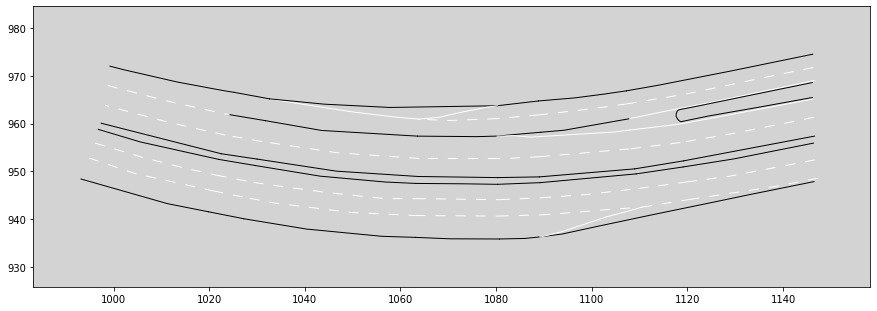

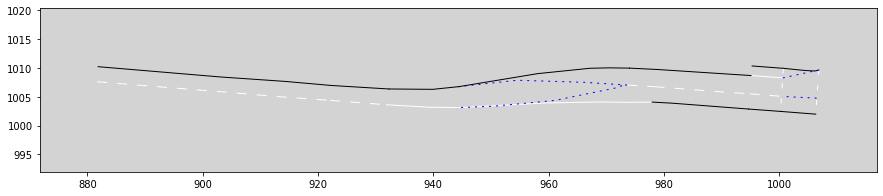

In [66]:

import matplotlib.pyplot as plt
from utils import map_vis_without_lanelet

map_file_list = ['DR_CHN_Merging_ZS.osm', 'DR_DEU_Merging_MT.osm']

for f in map_file_list:
    map_file = '../maps/' + f
    
    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(15, 8)
    # fig.canvas.set_window_title("Interaction Dataset Visualization")

    lat_origin = 0. 
    lon_origin = 0.  
    map_vis_without_lanelet.draw_map_without_lanelet(map_file, axes, lat_origin, lon_origin)



### Read & Visualize .osm file

In [63]:
import codecs
# import osm2geojson

with codecs.open('../maps/DR_DEU_Merging_MT.osm', 'rb', encoding='utf-8') as f:
    xml = f.read() 
    print(xml)

# geojson = osm2geojson.xml2geojson(xml)

<?xml version="1.0"?>
<osm version="0.6" generator="lanelet2">
  <node id="1000" visible="true" version="1" lat="0.00911336406" lon="0.00893057096" />
  <node id="1001" visible="true" version="1" lat="0.00912054843" lon="0.00902978997" />
  <node id="1002" visible="true" version="1" lat="0.00908017576" lon="0.00819721417" />
  <node id="1003" visible="true" version="1" lat="0.00908786177" lon="0.00810720822" />
  <node id="1004" visible="true" version="1" lat="0.00912725425" lon="0.00791408995" />
  <node id="1005" visible="true" version="1" lat="0.00910360617" lon="0.00791273837" />
  <node id="1006" visible="true" version="1" lat="0.00910421605" lon="0.00820492313" />
  <node id="1007" visible="true" version="1" lat="0.00911121833" lon="0.0081038074" />
  <node id="1008" visible="true" version="1" lat="0.00905717938" lon="0.0089765227" />
  <node id="1009" visible="true" version="1" lat="0.00907038154" lon="0.00860925636" />
  <node id="1010" visible="true" version="1" lat="0.0091254

filename ../maps/DR_USA_Roundabout_FT.osm
145 {'pedestrian_marking', 'traffic_sign', 'curbstone', 'line_thin', 'line_thick', 'virtual'}


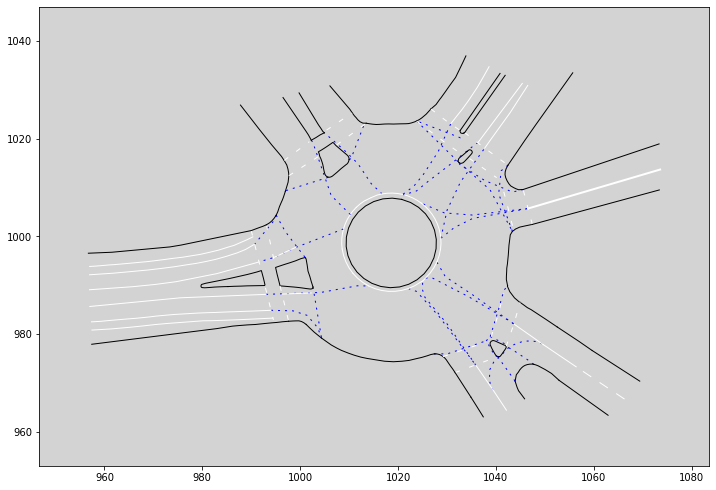

filename ../maps/DR_USA_Intersection_MA.osm
139 {'curbstone', 'traffic_sign', 'stop_line', 'line_thick', 'line_thin', 'virtual'}


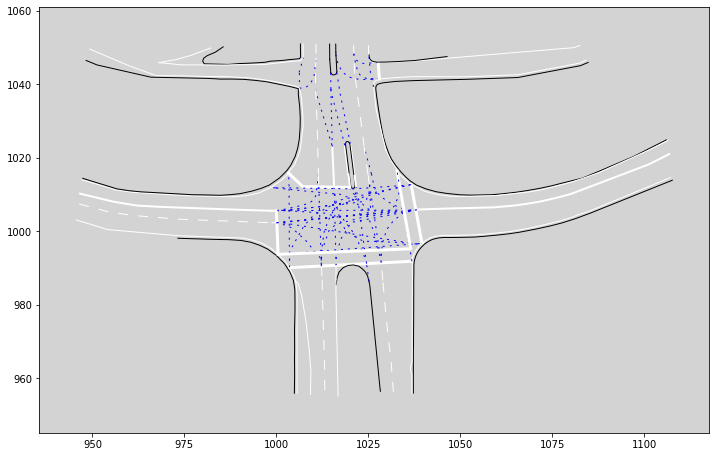

filename ../maps/DR_DEU_Merging_MT.osm
26 {'pedestrian_marking', 'virtual', 'curbstone', 'line_thin'}


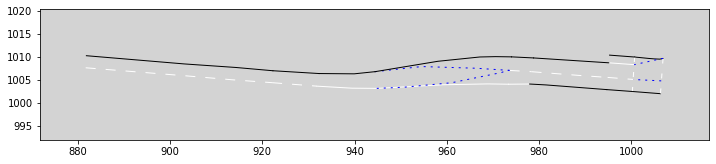

filename ../maps/DR_CHN_Merging_ZS.osm
71 {'guard_rail', 'line_thin'}


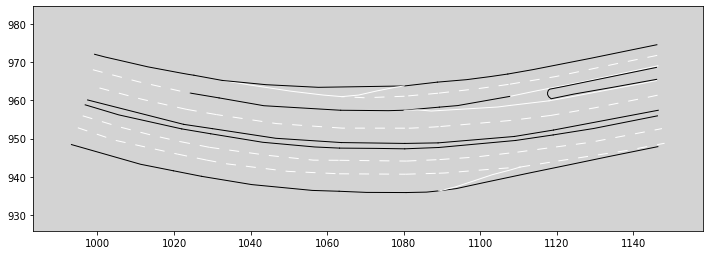

filename ../maps/DR_USA_Roundabout_SR.osm
111 {'curbstone', 'pedestrian_marking', 'traffic_sign', 'line_thin', 'virtual'}


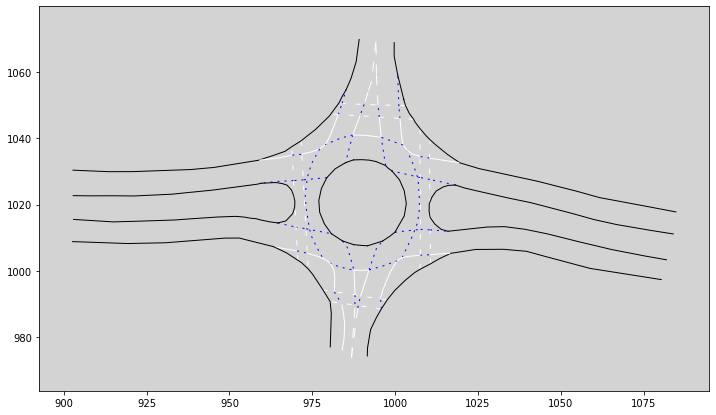

filename ../maps/DR_USA_Roundabout_EP.osm
131 {'curbstone', 'traffic_sign', 'pedestrian_marking', 'stop_line', 'line_thin', 'virtual'}


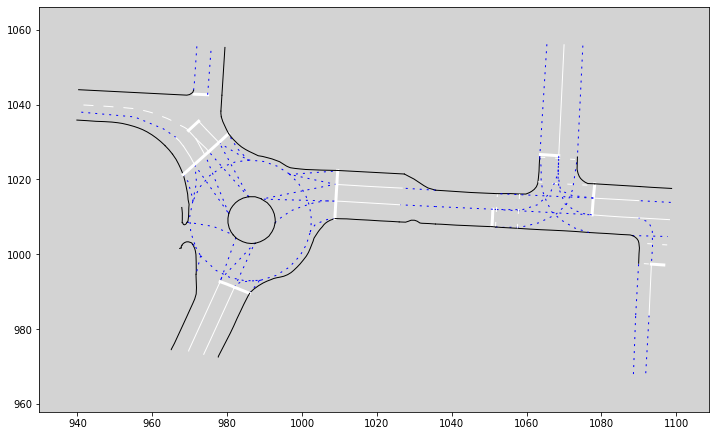

filename ../maps/DR_USA_Intersection_EP1.osm
149 {'pedestrian_marking', 'traffic_sign', 'curbstone', 'stop_line', 'line_thick', 'line_thin', 'virtual'}


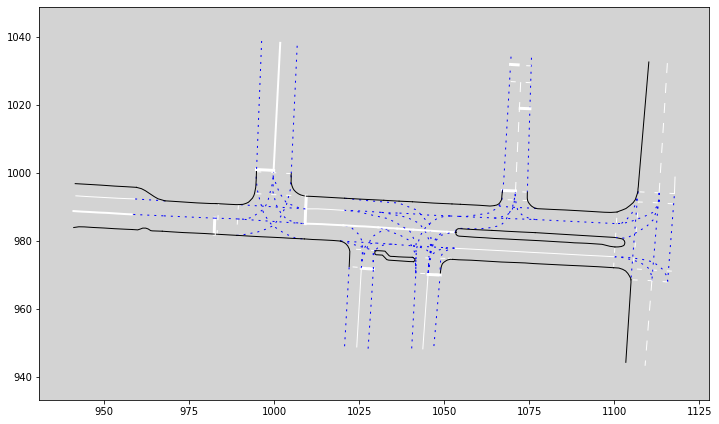

filename ../maps/DR_CHN_Roundabout_LN.osm
157 {'pedestrian_marking', 'curbstone', 'line_thin', 'stop_line', 'virtual'}


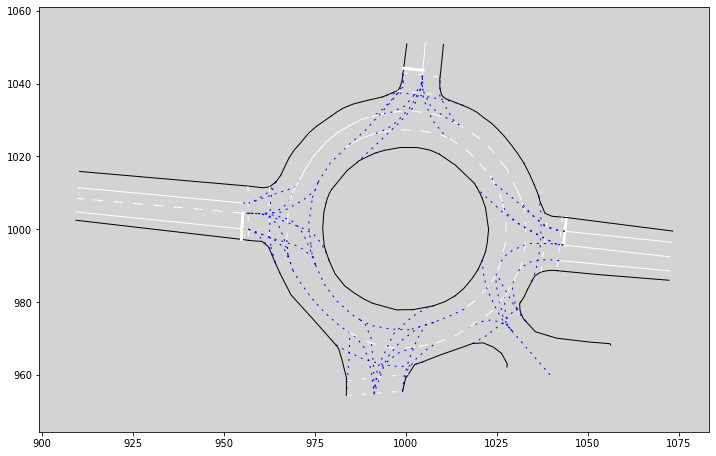

filename ../maps/DR_USA_Intersection_EP0.osm
108 {'pedestrian_marking', 'traffic_sign', 'curbstone', 'line_thin', 'line_thick', 'stop_line', 'virtual'}


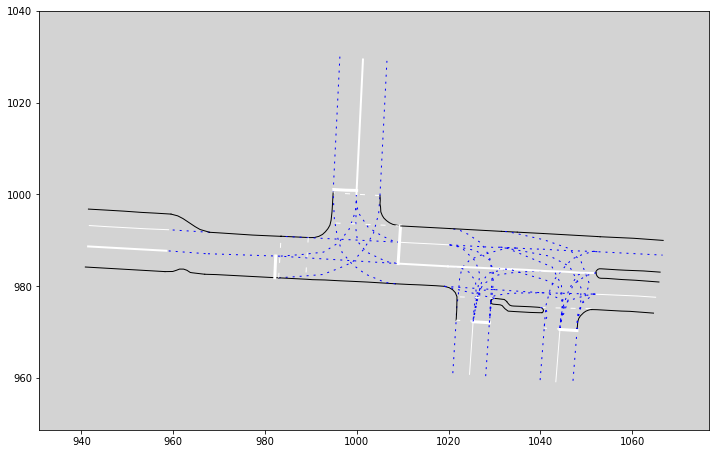

filename ../maps/DR_DEU_Roundabout_OF.osm
113 {'pedestrian_marking', 'traffic_sign', 'curbstone', 'line_thin', 'virtual'}


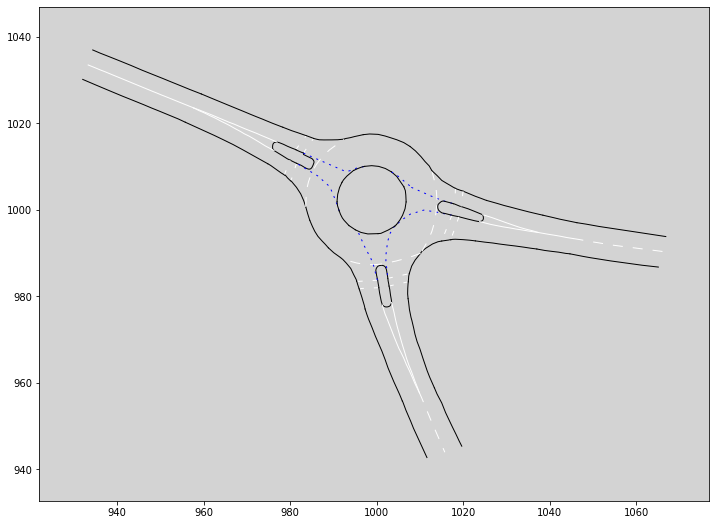

filename ../maps/TC_BGR_Intersection_VA.osm
79 {'pedestrian_marking', 'curbstone', 'stop_line', 'line_thick', 'virtual'}


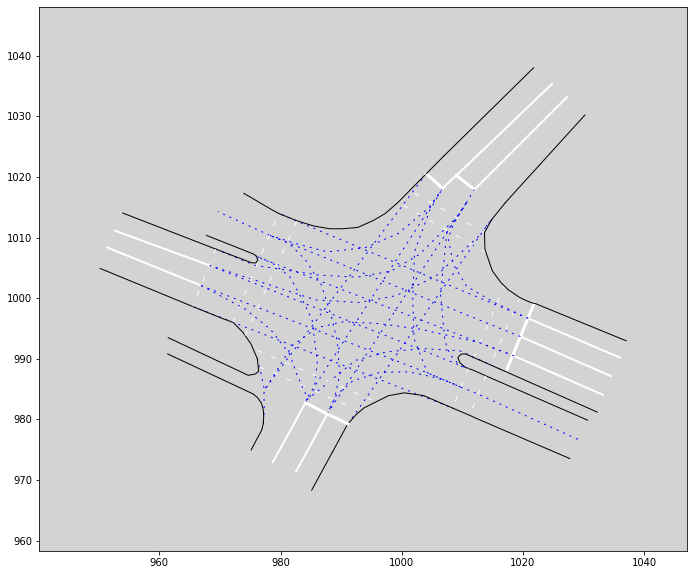

filename ../maps/DR_USA_Intersection_GL.osm
163 {'pedestrian_marking', 'traffic_sign', 'curbstone', 'road_border', 'line_thin', 'line_thick', 'stop_line', 'virtual'}


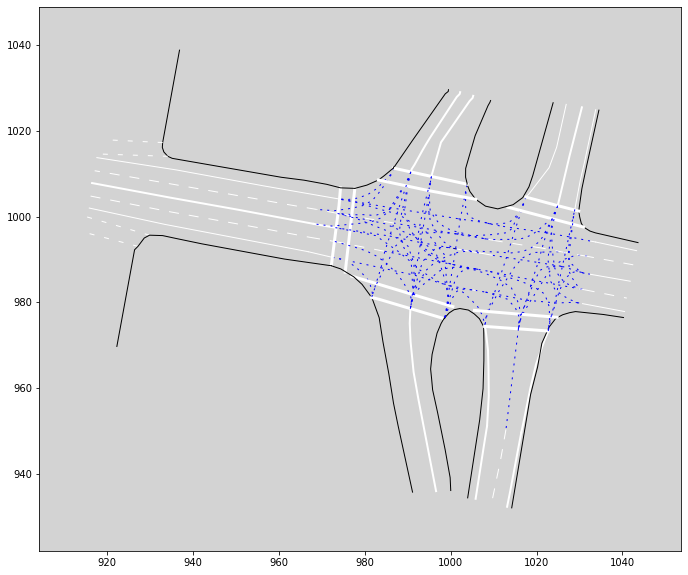

In [88]:
import glob

map_file_list = glob.glob('../maps/*.osm')
# map_file_list = ['DR_DEU_Merging_MT.osm', 'DR_CHN_Merging_ZS.osm'] #, ]

for f in map_file_list:
    print('filename', f)
    
    lat_origin = 0
    lon_origin = 0

    projector = LL2XYProjector(lat_origin, lon_origin)

    fig, axes = plt.subplots(1, 1)
    fig.set_size_inches(12,10)
    axes.set_aspect('equal', adjustable='box')
    axes.patch.set_facecolor('lightgrey')

    
    map_file = '../maps/' + f
    tree = xml.parse(map_file).getroot()
    
    point_dict = dict()
    for node in tree.findall("node"):
        point = Point()
        point.x, point.y = projector.latlon2xy(float(node.get('lat')), float(node.get('lon')))
    #     print('point', point.x, point.y)
        point_dict[int(node.get('id'))] = point
        
    set_visible_area(point_dict, axes)
    
    all_way_type = []    
    unknown_linestring_types = list()
    for i, way in enumerate(tree.findall('way')):
        way_type = get_type(way)
        all_way_type.append(way_type)

        if way_type is None:
            raise RuntimeError("Linestring type must be specified")
        elif way_type == "curbstone":
            type_dict = dict(color="black", linewidth=1, zorder=10)
            
        elif way_type == "line_thin":
            way_subtype = get_subtype(way)
            if way_subtype == "dashed":
                type_dict = dict(color="white", linewidth=1, zorder=10, dashes=[10, 10])
            else:
                type_dict = dict(color="white", linewidth=1, zorder=10)
                
        elif way_type == "line_thick":
            way_subtype = get_subtype(way)
            if way_subtype == "dashed":
                type_dict = dict(color="white", linewidth=2, zorder=10, dashes=[10, 10])
            else:
                type_dict = dict(color="white", linewidth=2, zorder=10)
                
        elif way_type == "pedestrian_marking":
            type_dict = dict(color="white", linewidth=1, zorder=10, dashes=[5, 10])
        elif way_type == "bike_marking":
            type_dict = dict(color="white", linewidth=1, zorder=10, dashes=[5, 10])
        elif way_type == "stop_line":
            type_dict = dict(color="white", linewidth=3, zorder=10)
        elif way_type == "virtual":
            type_dict = dict(color="blue", linewidth=1, zorder=10, dashes=[2, 5])
            
        elif way_type == "road_border":
            type_dict = dict(color="black", linewidth=1, zorder=10)
        elif way_type == "guard_rail":
            type_dict = dict(color="black", linewidth=1, zorder=10)
        elif way_type == "traffic_sign":
            continue
        else:
            if way_type not in unknown_linestring_types:
                unknown_linestring_types.append(way_type)
            continue

        x_list, y_list = get_x_y_lists(way, point_dict)
        plt.plot(x_list, y_list, **type_dict)
     
    print(len(all_way_type), set(all_way_type))
    plt.show()